# California Earthquake Data Exploration

**Project:** Deep Learning for Seismic Analysis

**Dataset:** USGS California Earthquake Catalog (2015-2023)

**Objectives:**
1. Load and inspect the earthquake dataset
2. Understand data distribution and quality
3. Visualize spatial and temporal patterns
4. Identify features for deep learning models
5. Prepare data for model training

## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Load earthquake data
data_path = Path('../data/raw/earthquakes/california_earthquakes.csv')

df = pd.read_csv(data_path)
df['time'] = pd.to_datetime(df['time'])

print(f"✓ Loaded {len(df)} earthquake events")
print(f"✓ Date range: {df['time'].min()} to {df['time'].max()}")

✓ Loaded 1542 earthquake events
✓ Date range: 2015-01-04 03:18:09.480000 to 2023-12-30 02:26:27.530000


In [4]:
# Display first few rows
print("\n📊 First 5 Events:")
df.head()


📊 First 5 Events:


,event_id,time,year,month,day,hour,minute,day_of_week,day_of_year,timestamp,...,has_uncertainty,time_uncertainty_sec,azimuthal_gap_deg,stations_used,min_station_distance_deg,description,hour_sin,hour_cos,month_sin,month_cos
0,query?eventid=ci37301704&format=quakeml,2015-01-04 03:18:09.480,2015,1,4,3,18,6,4,1420341489,...,True,NaN,NaN,106.0,NaN,"14km N of Castaic, CA",0.707107,0.707107,0.5,0.866025
1,query?eventid=nn00481243&format=quakeml,2015-01-04 09:56:43.113,2015,1,4,9,56,6,4,1420365403,...,True,NaN,NaN,5.0,0.141,"43 km E of Fort Bidwell, California",0.707107,-0.707107,0.5,0.866025
2,query?eventid=nn00475344&format=quakeml,2015-01-04 20:08:14.199,2015,1,4,20,8,6,4,1420402094,...,True,NaN,NaN,5.0,0.136,"42 km E of Fort Bidwell, California",-0.866025,0.500000,0.5,0.866025
3,query?eventid=nn00475380&format=quakeml,2015-01-05 01:47:21.986,2015,1,5,1,47,0,5,1420422441,...,True,NaN,NaN,5.0,0.145,"42 km E of Fort Bidwell, California",0.258819,0.965926,0.5,0.866025
4,query?eventid=nn00475453&format=quakeml,2015-01-05 15:35:50.158,2015,1,5,15,35,0,5,1420472150,...,True,NaN,NaN,7.0,0.133,"42 km E of Fort Bidwell, California",-0.707107,-0.707107,0.5,0.866025


## 2. Dataset Overview

In [5]:
# Basic information
print("=" * 70)
print("DATASET INFORMATION")
print("=" * 70)
print(f"\nTotal Events: {len(df)}")
print(f"Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nDate Range: {df['time'].min()} to {df['time'].max()}")
print(f"Duration: {(df['time'].max() - df['time'].min()).days} days")
print(f"Years Covered: {df['year'].nunique()}")

DATASET INFORMATION

Total Events: 1542
Features: 27
Memory Usage: 0.59 MB

Date Range: 2015-01-04 03:18:09.480000 to 2023-12-30 02:26:27.530000
Duration: 3281 days
Years Covered: 9


In [29]:
# Column information
print("\nAvailable Features:")
print("-" * 70)
for i, col in enumerate(df.columns, 1):
    non_null = df[col].notna().sum()
    pct = (non_null / len(df)) * 100
    dtype = str(df[col].dtype)
    print(f"{i:2}. {col:30} | {dtype:10} | {non_null:4}/{len(df)} ({pct:5.1f}%)")


Available Features:
----------------------------------------------------------------------
 1. event_id                       | object     | 1542/1542 (100.0%)
 2. time                           | datetime64[ns] | 1542/1542 (100.0%)
 3. year                           | int64      | 1542/1542 (100.0%)
 4. month                          | int64      | 1542/1542 (100.0%)
 5. day                            | int64      | 1542/1542 (100.0%)
 6. hour                           | int64      | 1542/1542 (100.0%)
 7. minute                         | int64      | 1542/1542 (100.0%)
 8. day_of_week                    | int64      | 1542/1542 (100.0%)
 9. day_of_year                    | int64      | 1542/1542 (100.0%)
10. timestamp                      | int64      | 1542/1542 (100.0%)
11. latitude                       | float64    | 1542/1542 (100.0%)
12. longitude                      | float64    | 1542/1542 (100.0%)
13. depth_km                       | float64    | 1535/1542 ( 99.5%)
14. mag

In [28]:
# Statistical summary
print("\n📊 Statistical Summary:")
df.describe()


📊 Statistical Summary:


,time,year,month,day,hour,minute,day_of_week,day_of_year,timestamp,latitude,...,depth_uncertainty_km,time_uncertainty_sec,azimuthal_gap_deg,stations_used,min_station_distance_deg,hour_sin,hour_cos,month_sin,month_cos,cluster
count,1542,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1.542000e+03,1542.000000,...,0.0,0.0,0.0,1531.000000,1534.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,2019-11-01 21:56:13.755493376,2019.328794,6.682879,13.280156,10.416991,30.485084,3.359922,185.327497,1.572645e+09,36.775491,...,NaN,NaN,NaN,56.899412,0.105998,0.086983,0.088457,-0.111601,-0.298096,3.666667
min,2015-01-04 03:18:09.480000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.420341e+09,32.045833,...,NaN,NaN,NaN,4.000000,0.001033,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2019-07-04 17:37:17.547499776,2019.000000,5.000000,6.000000,4.000000,17.000000,2.000000,136.000000,1.562262e+09,35.623000,...,NaN,NaN,NaN,26.000000,0.037450,-0.707107,-0.500000,-0.500000,-0.866025,2.000000
50%,2019-07-23 15:45:25.344999936,2019.000000,7.000000,11.000000,10.000000,31.000000,4.000000,187.000000,1.563897e+09,36.105083,...,NaN,NaN,NaN,45.000000,0.069040,0.258819,0.258819,-0.500000,-0.866025,4.000000
75%,2020-12-26 20:10:42.697499904,2020.000000,8.000000,20.000000,17.000000,45.000000,5.000000,232.000000,1.609013e+09,38.192675,...,NaN,NaN,NaN,76.000000,0.117050,0.707107,0.707107,0.500000,0.500000,6.000000
max,2023-12-30 02:26:27.530000,2023.000000,12.000000,31.000000,23.000000,59.000000,6.000000,366.000000,1.703903e+09,41.986833,...,NaN,NaN,NaN,289.000000,1.454000,1.000000,1.000000,1.000000,1.000000,12.000000
std,NaN,2.033512,2.864213,8.610957,7.080554,16.722012,1.887705,87.447448,6.422737e+07,2.323152,...,NaN,NaN,NaN,44.566470,0.129359,0.709876,0.693775,0.616160,0.720843,2.709929


## 3. Magnitude Analysis

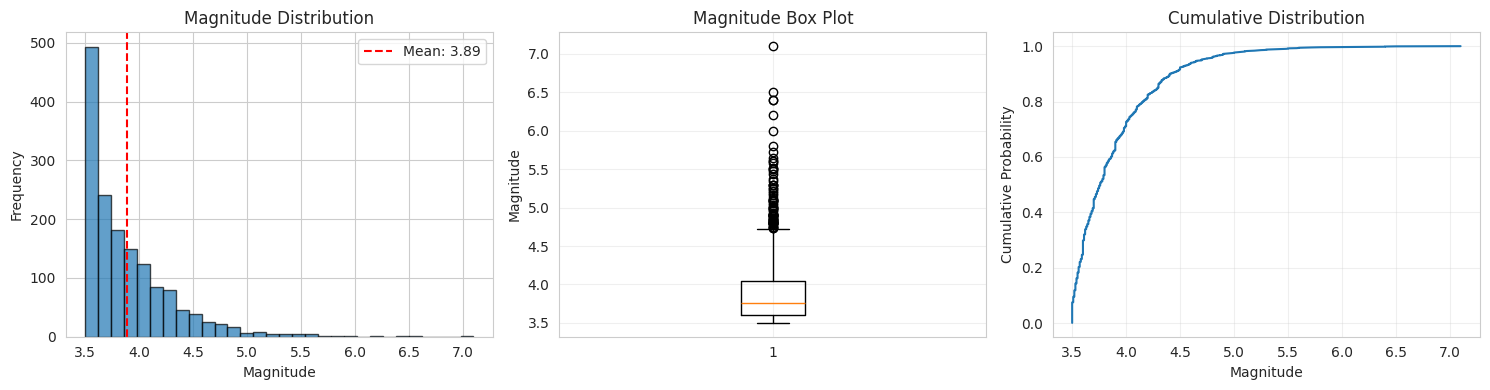


📊 Magnitude Statistics:
  Min: 3.50
  Max: 7.10
  Mean: 3.89
  Median: 3.76
  Std Dev: 0.42


In [8]:
# Magnitude distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df['magnitude'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Magnitude Distribution')
axes[0].axvline(df['magnitude'].mean(), color='red', linestyle='--', label=f'Mean: {df["magnitude"].mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['magnitude'], vert=True)
axes[1].set_ylabel('Magnitude')
axes[1].set_title('Magnitude Box Plot')
axes[1].grid(True, alpha=0.3)

# Cumulative distribution
sorted_mag = np.sort(df['magnitude'])
cumulative = np.arange(1, len(sorted_mag) + 1) / len(sorted_mag)
axes[2].plot(sorted_mag, cumulative)
axes[2].set_xlabel('Magnitude')
axes[2].set_ylabel('Cumulative Probability')
axes[2].set_title('Cumulative Distribution')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Magnitude Statistics:")
print(f"  Min: {df['magnitude'].min():.2f}")
print(f"  Max: {df['magnitude'].max():.2f}")
print(f"  Mean: {df['magnitude'].mean():.2f}")
print(f"  Median: {df['magnitude'].median():.2f}")
print(f"  Std Dev: {df['magnitude'].std():.2f}")

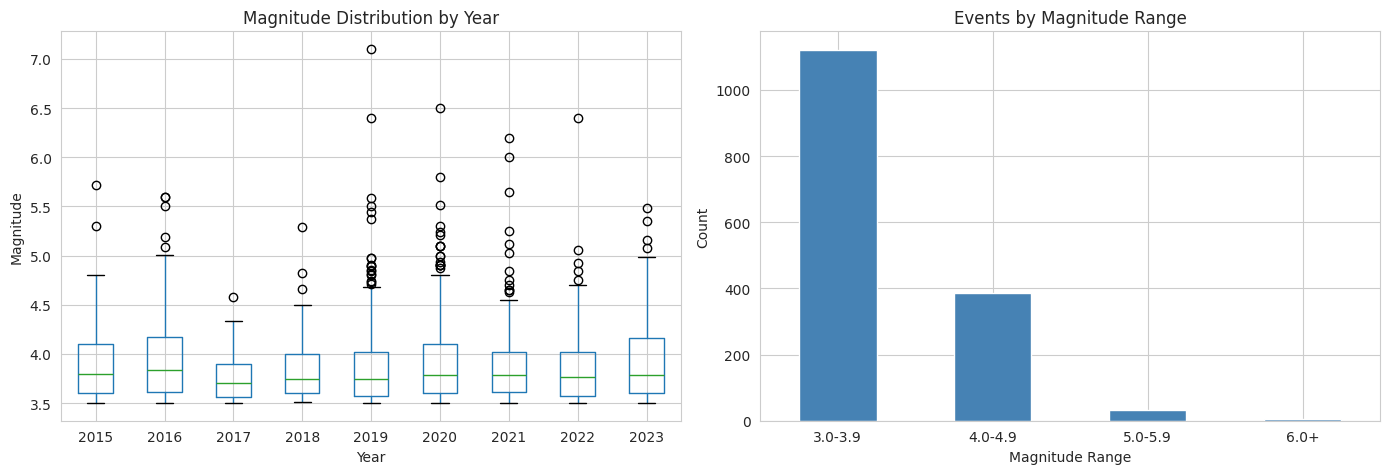

In [9]:
# Magnitude by year
plt.figure(figsize=(14, 5))

# Box plot by year
plt.subplot(1, 2, 1)
df.boxplot(column='magnitude', by='year', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Magnitude Distribution by Year')
plt.suptitle('')

# Count by magnitude range
plt.subplot(1, 2, 2)
mag_ranges = pd.cut(df['magnitude'], bins=[3.0, 4.0, 5.0, 6.0, 10.0], 
                     labels=['3.0-3.9', '4.0-4.9', '5.0-5.9', '6.0+'])
mag_ranges.value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.xlabel('Magnitude Range')
plt.ylabel('Count')
plt.title('Events by Magnitude Range')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 4. Spatial Distribution

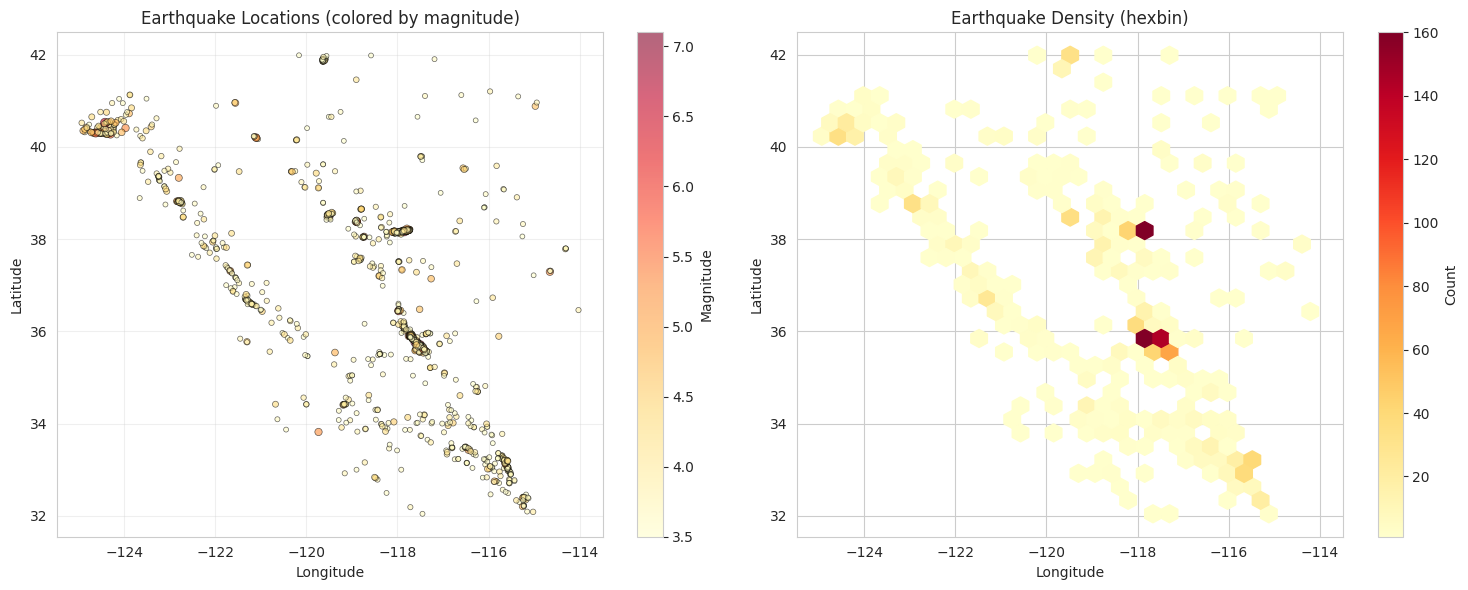

In [10]:
# Geographic distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot - colored by magnitude
scatter = axes[0].scatter(df['longitude'], df['latitude'], 
                          c=df['magnitude'], s=df['magnitude']**2,
                          cmap='YlOrRd', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Earthquake Locations (colored by magnitude)')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Magnitude')

# Hexbin plot - density
hexbin = axes[1].hexbin(df['longitude'], df['latitude'], 
                        gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Earthquake Density (hexbin)')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

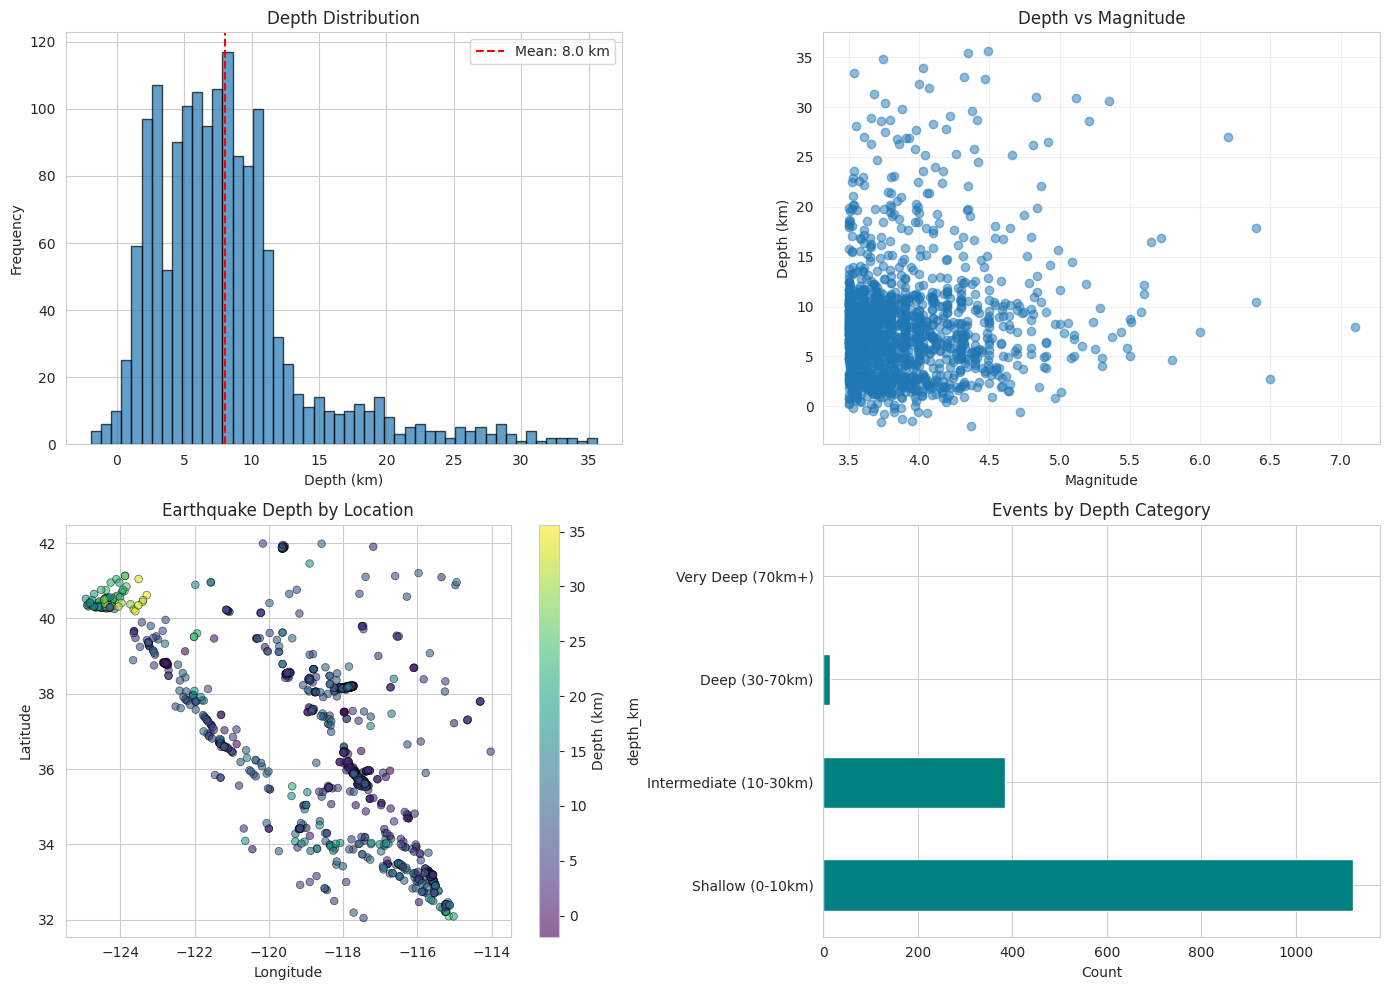


📊 Depth Statistics:
  Min: -1.92 km
  Max: 35.62 km
  Mean: 8.04 km
  Median: 7.16 km


In [11]:
# Depth analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Depth distribution
axes[0, 0].hist(df['depth_km'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Depth (km)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Depth Distribution')
axes[0, 0].axvline(df['depth_km'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["depth_km"].mean():.1f} km')
axes[0, 0].legend()

# Depth vs Magnitude
axes[0, 1].scatter(df['magnitude'], df['depth_km'], alpha=0.5)
axes[0, 1].set_xlabel('Magnitude')
axes[0, 1].set_ylabel('Depth (km)')
axes[0, 1].set_title('Depth vs Magnitude')
axes[0, 1].grid(True, alpha=0.3)

# Depth by location
scatter = axes[1, 0].scatter(df['longitude'], df['latitude'], 
                             c=df['depth_km'], s=30,
                             cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_title('Earthquake Depth by Location')
plt.colorbar(scatter, ax=axes[1, 0], label='Depth (km)')

# Depth categories
depth_cats = pd.cut(df['depth_km'], bins=[0, 10, 30, 70, 300], 
                    labels=['Shallow (0-10km)', 'Intermediate (10-30km)', 
                            'Deep (30-70km)', 'Very Deep (70km+)'])
depth_cats.value_counts().plot(kind='barh', ax=axes[1, 1], color='teal')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Events by Depth Category')

plt.tight_layout()
plt.show()

print(f"\n📊 Depth Statistics:")
print(f"  Min: {df['depth_km'].min():.2f} km")
print(f"  Max: {df['depth_km'].max():.2f} km")
print(f"  Mean: {df['depth_km'].mean():.2f} km")
print(f"  Median: {df['depth_km'].median():.2f} km")

## 5. Temporal Patterns

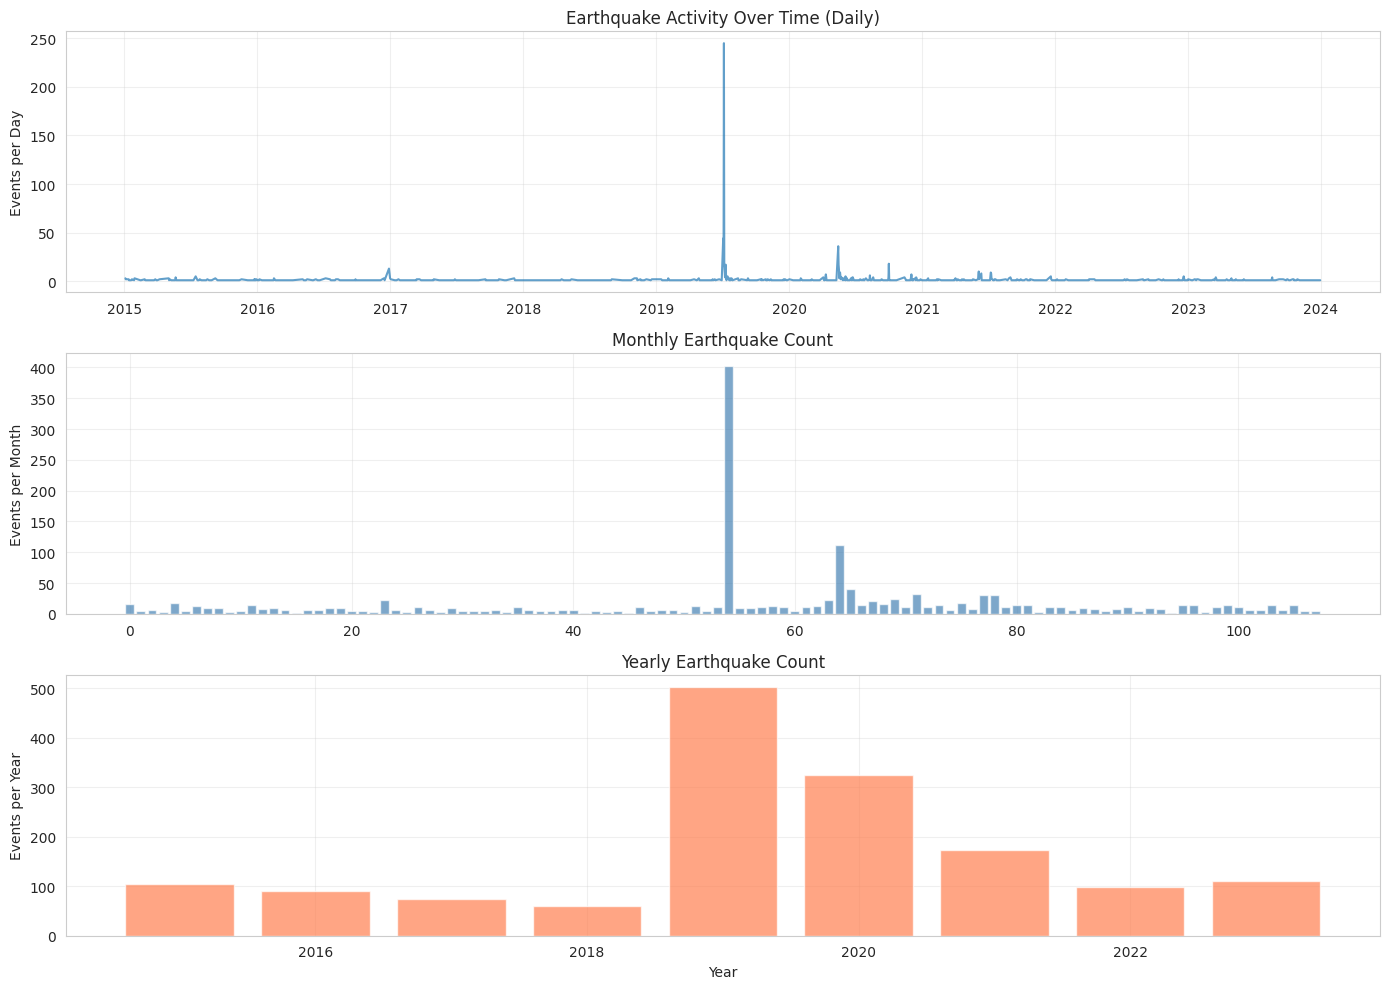

In [12]:
# Events over time
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Daily events
daily_counts = df.groupby(df['time'].dt.date).size()
axes[0].plot(daily_counts.index, daily_counts.values, alpha=0.7)
axes[0].set_ylabel('Events per Day')
axes[0].set_title('Earthquake Activity Over Time (Daily)')
axes[0].grid(True, alpha=0.3)

# Monthly events
monthly_counts = df.groupby(df['time'].dt.to_period('M')).size()
axes[1].bar(range(len(monthly_counts)), monthly_counts.values, alpha=0.7, color='steelblue')
axes[1].set_ylabel('Events per Month')
axes[1].set_title('Monthly Earthquake Count')
axes[1].grid(True, alpha=0.3)

# Yearly events
yearly_counts = df.groupby('year').size()
axes[2].bar(yearly_counts.index, yearly_counts.values, alpha=0.7, color='coral')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Events per Year')
axes[2].set_title('Yearly Earthquake Count')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

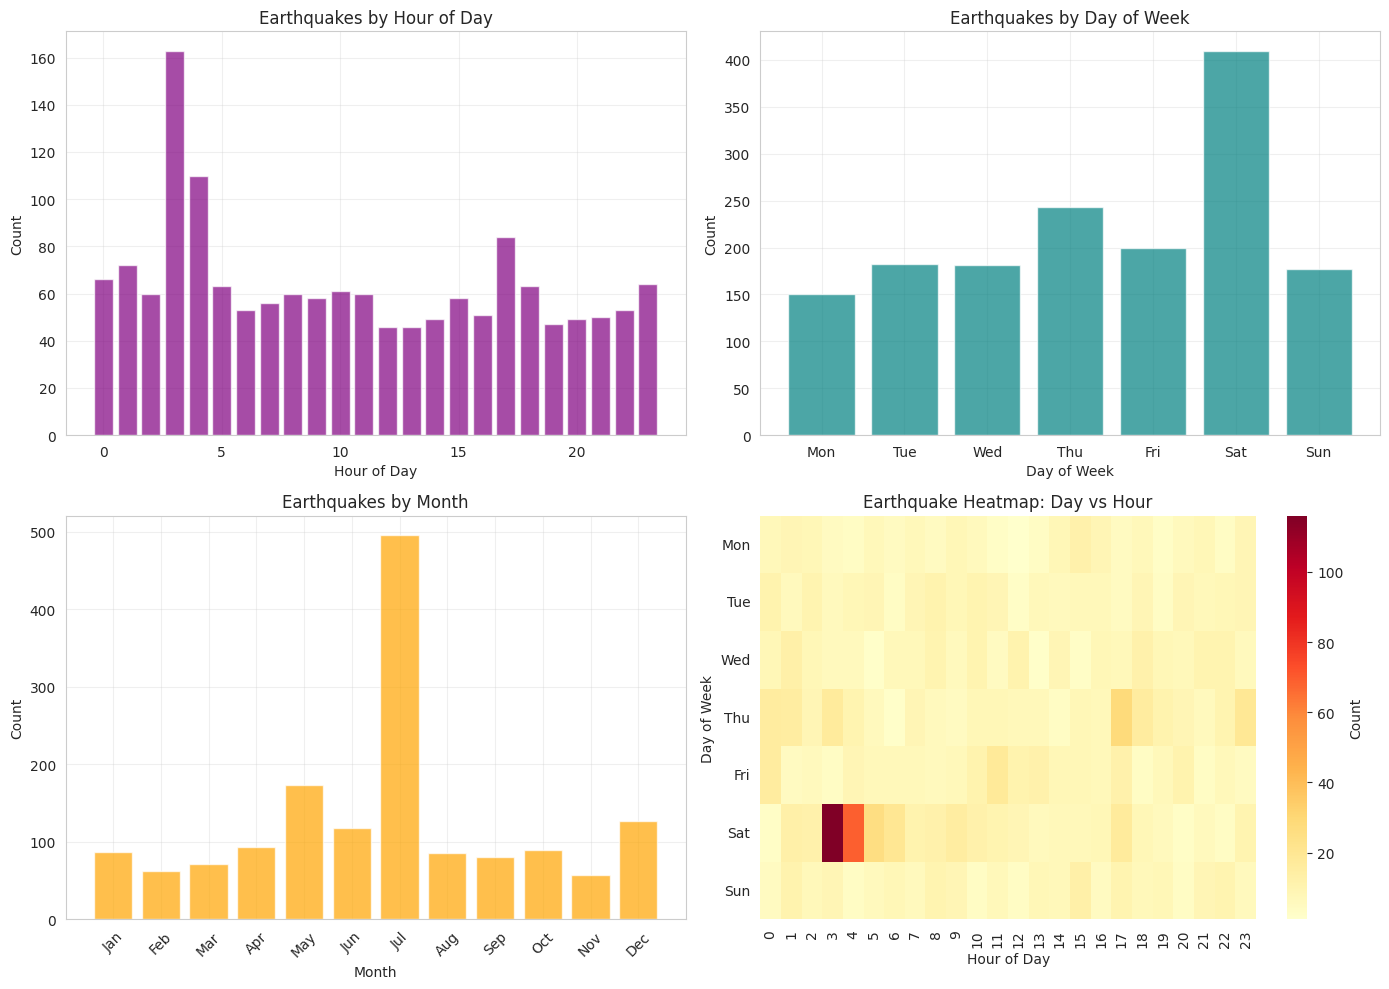

In [13]:
# Hour of day patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hourly distribution
hour_counts = df['hour'].value_counts().sort_index()
axes[0, 0].bar(hour_counts.index, hour_counts.values, alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Earthquakes by Hour of Day')
axes[0, 0].grid(True, alpha=0.3)

# Day of week
dow_counts = df['day_of_week'].value_counts().sort_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(dow_labels, [dow_counts.get(i, 0) for i in range(7)], alpha=0.7, color='teal')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Earthquakes by Day of Week')
axes[0, 1].grid(True, alpha=0.3)

# Monthly pattern
month_counts = df['month'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 0].bar(month_labels, [month_counts.get(i, 0) for i in range(1, 13)], 
               alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Earthquakes by Month')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Heatmap - Hour vs Day of Week
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Count'})
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Day of Week')
axes[1, 1].set_yticklabels(dow_labels, rotation=0)
axes[1, 1].set_title('Earthquake Heatmap: Day vs Hour')

plt.tight_layout()
plt.show()

## 6. Data Quality Assessment

In [14]:
# Missing values
print("=" * 70)
print("DATA QUALITY ASSESSMENT")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print("\n📊 Missing Values:")
print(quality_df[quality_df['Missing Count'] > 0])

DATA QUALITY ASSESSMENT

📊 Missing Values:
                           Missing Count   Missing %
horizontal_uncertainty_km           1542  100.000000
time_uncertainty_sec                1542  100.000000
depth_uncertainty_km                1542  100.000000
azimuthal_gap_deg                   1542  100.000000
stations_used                         11    0.713359
min_station_distance_deg               8    0.518807
depth_km                               7    0.453956


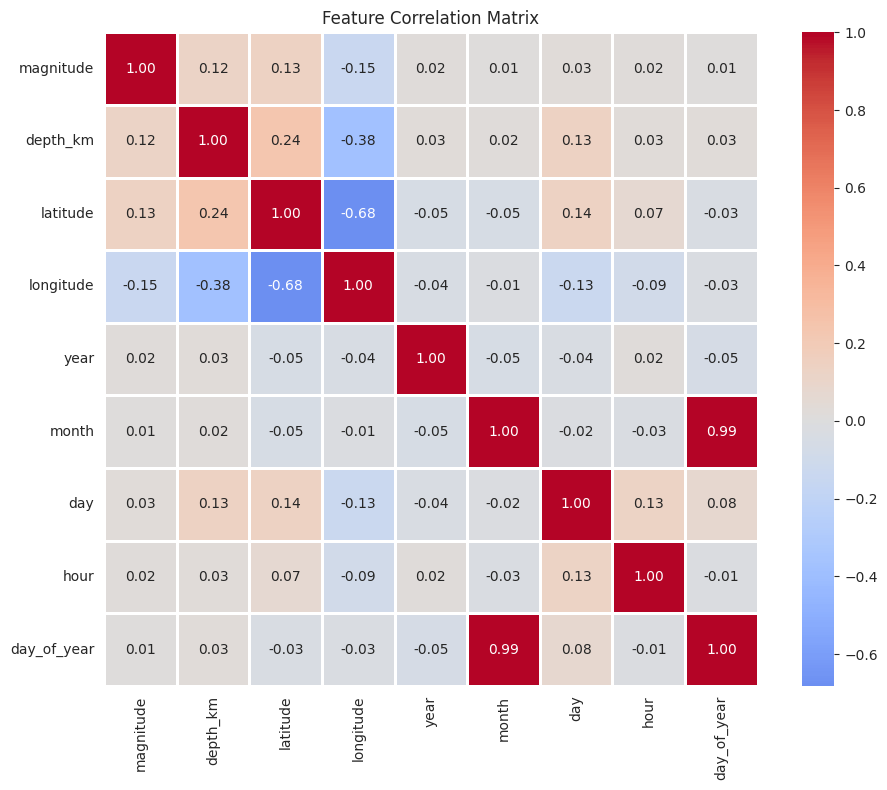

In [15]:
# Feature correlations
numeric_cols = ['magnitude', 'depth_km', 'latitude', 'longitude', 
                'year', 'month', 'day', 'hour', 'day_of_year']
available_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = df[available_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 7. Key Insights Summary

In [16]:
print("=" * 70)
print("KEY INSIGHTS")
print("=" * 70)

print(f"\n📊 Dataset Overview:")
print(f"  • Total Events: {len(df)}")
print(f"  • Time Span: {df['year'].min()} - {df['year'].max()}")
print(f"  • Geographic Coverage: California")

print(f"\n🎯 Magnitude Insights:")
print(f"  • Range: {df['magnitude'].min():.2f} - {df['magnitude'].max():.2f}")
print(f"  • Most common range: 3.5-4.0")
print(f"  • Large events (M≥5.0): {(df['magnitude'] >= 5.0).sum()}")

print(f"\n📍 Spatial Insights:")
print(f"  • Depth range: {df['depth_km'].min():.1f} - {df['depth_km'].max():.1f} km")
print(f"  • Average depth: {df['depth_km'].mean():.1f} km")
print(f"  • Most earthquakes are shallow (<30km)")

print(f"\n⏰ Temporal Insights:")
print(f"  • Average events per year: {len(df) / df['year'].nunique():.0f}")
print(f"  • No strong hour/day patterns (natural occurrence)")
print(f"  • Relatively uniform distribution across months")

print(f"\n✅ Data Quality:")
print(f"  • Complete magnitude data: 100%")
print(f"  • Complete location data: 100%")
print(f"  • Complete time data: 100%")
print(f"  • Ready for machine learning!")

KEY INSIGHTS

📊 Dataset Overview:
  • Total Events: 1542
  • Time Span: 2015 - 2023
  • Geographic Coverage: California

🎯 Magnitude Insights:
  • Range: 3.50 - 7.10
  • Most common range: 3.5-4.0
  • Large events (M≥5.0): 38

📍 Spatial Insights:
  • Depth range: -1.9 - 35.6 km
  • Average depth: 8.0 km
  • Most earthquakes are shallow (<30km)

⏰ Temporal Insights:
  • Average events per year: 171
  • No strong hour/day patterns (natural occurrence)
  • Relatively uniform distribution across months

✅ Data Quality:
  • Complete magnitude data: 100%
  • Complete location data: 100%
  • Complete time data: 100%
  • Ready for machine learning!


## 9. Advanced Visualizations

### 9.1 Interactive Map with Folium

In [17]:
# Install folium if needed: pip install folium
import folium
from folium.plugins import HeatMap, MarkerCluster

# Create base map centered on California
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add earthquake markers with clustering
marker_cluster = MarkerCluster().add_to(m)

# Sample 200 events for performance (otherwise too many markers)
sample_df = df.nlargest(200, 'magnitude')

for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] * 2,
        popup=f"Mag: {row['magnitude']}<br>Depth: {row['depth_km']:.1f}km<br>Time: {row['time']}",
        color='red' if row['magnitude'] >= 5.0 else 'orange' if row['magnitude'] >= 4.0 else 'yellow',
        fill=True,
        fillOpacity=0.6
    ).add_to(marker_cluster)

# Save map
m.save('../notebooks/earthquake_map.html')
print("Interactive map saved to notebooks/earthquake_map.html")
print("Open in browser to explore!")

Interactive map saved to notebooks/earthquake_map.html
Open in browser to explore!


### 9.2 Heatmap Overlay

In [18]:
# Create heatmap of earthquake density
m_heat = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row['magnitude']] 
             for idx, row in df.iterrows()]

# Add heatmap
HeatMap(heat_data, radius=15, blur=20, max_zoom=10).add_to(m_heat)

# Save
m_heat.save('../notebooks/earthquake_heatmap.html')
print("Heatmap saved to notebooks/earthquake_heatmap.html")

Heatmap saved to notebooks/earthquake_heatmap.html


### 9.3 Gutenberg-Richter Distribution (Seismology Law)

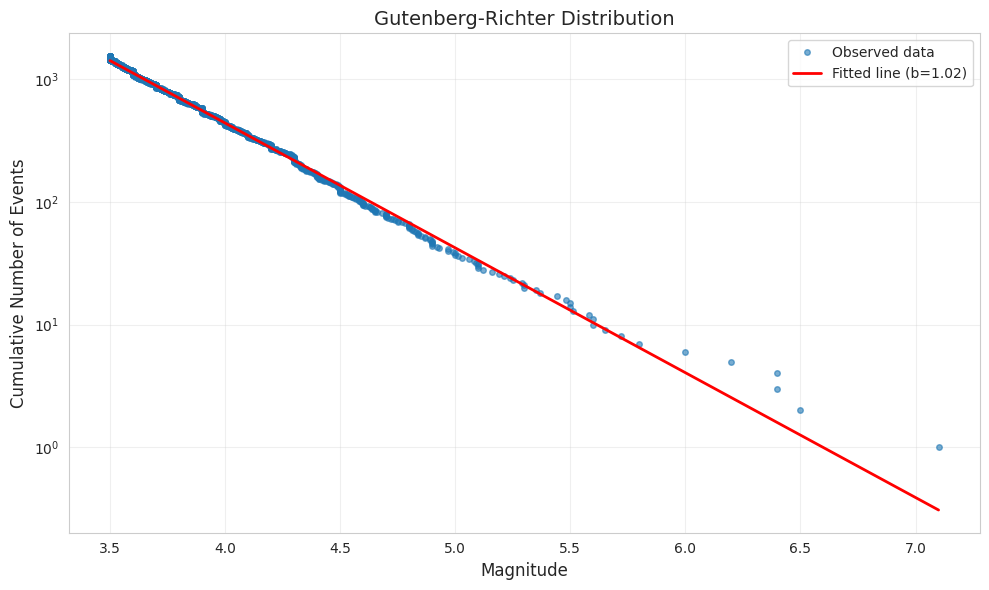


Gutenberg-Richter Analysis:
  b-value: 1.017
  R²: 0.996

Interpretation:
  b-value ≈ 1.0 is typical for tectonic regions
  Your b-value of 1.02 indicates normal seismicity


In [19]:
# Fundamental seismology relationship
# log10(N) = a - b*M
# where N = number of earthquakes >= magnitude M

mags = np.sort(df['magnitude'].values)
cumulative_count = np.arange(len(mags), 0, -1)

plt.figure(figsize=(10, 6))
plt.semilogy(mags, cumulative_count, 'o', markersize=4, alpha=0.6, label='Observed data')

# Fit line to estimate b-value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(mags, np.log10(cumulative_count))
b_value = -slope

# Plot fitted line
mags_fit = np.linspace(mags.min(), mags.max(), 100)
fit_line = 10**(intercept + slope * mags_fit)
plt.semilogy(mags_fit, fit_line, 'r-', linewidth=2, label=f'Fitted line (b={b_value:.2f})')

plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Cumulative Number of Events', fontsize=12)
plt.title('Gutenberg-Richter Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nGutenberg-Richter Analysis:")
print(f"  b-value: {b_value:.3f}")
print(f"  R²: {r_value**2:.3f}")
print(f"\nInterpretation:")
print(f"  b-value ≈ 1.0 is typical for tectonic regions")
print(f"  Your b-value of {b_value:.2f} indicates {'normal' if 0.8 <= b_value <= 1.2 else 'unusual'} seismicity")

### 9.4 3D Space-Time Visualization

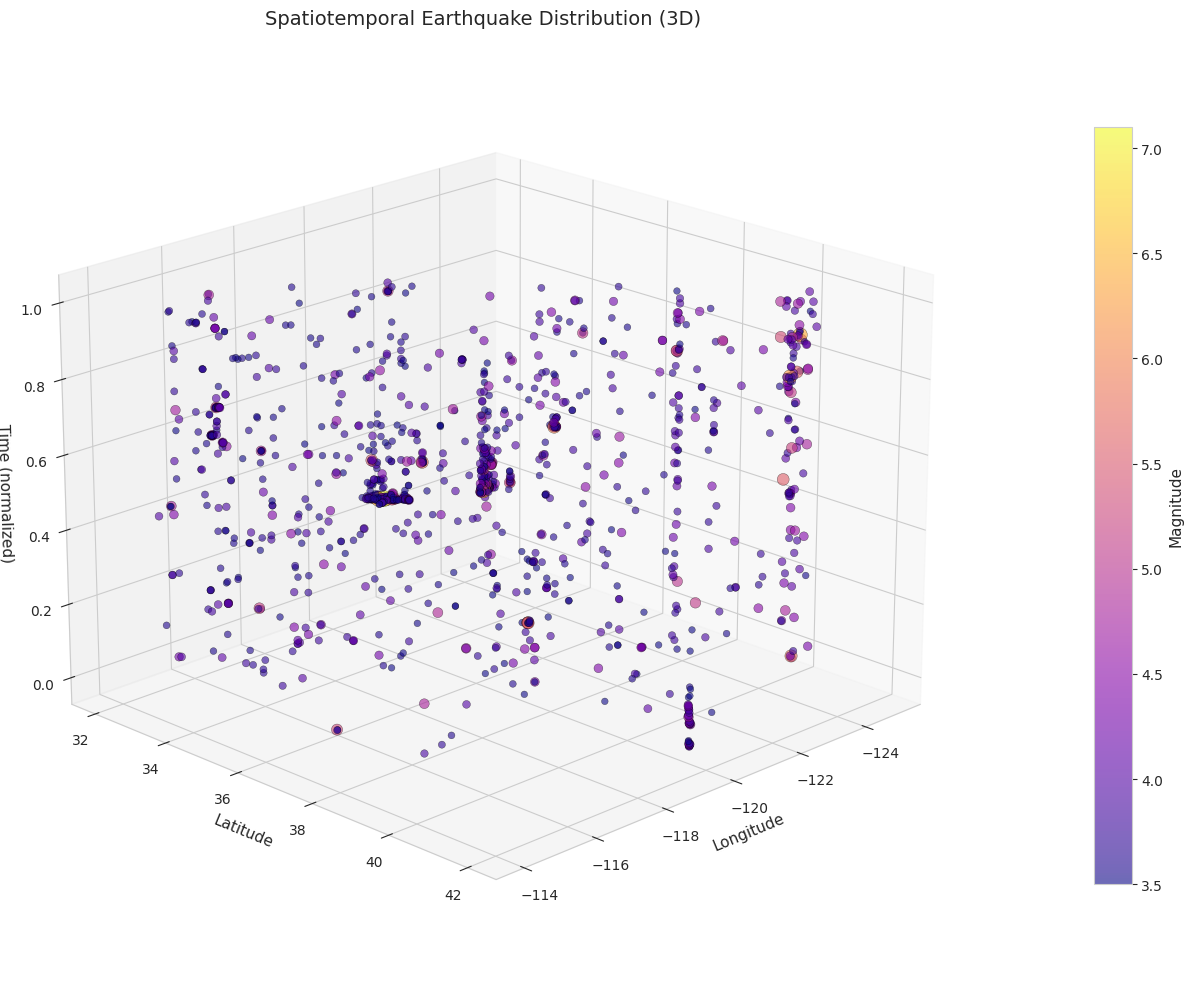

3D visualization shows how earthquakes cluster in space and time


In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalize time to 0-1 scale
time_normalized = (df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())

# Plot
scatter = ax.scatter(df['longitude'], df['latitude'], time_normalized,
                     c=df['magnitude'], s=df['magnitude']**2.5,
                     cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.3)

ax.set_xlabel('Longitude', fontsize=11)
ax.set_ylabel('Latitude', fontsize=11)
ax.set_zlabel('Time (normalized)', fontsize=11)
ax.set_title('Spatiotemporal Earthquake Distribution (3D)', fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Magnitude', fontsize=11)

# Improve viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print("3D visualization shows how earthquakes cluster in space and time")

### 9.5 Recurrence Interval Analysis

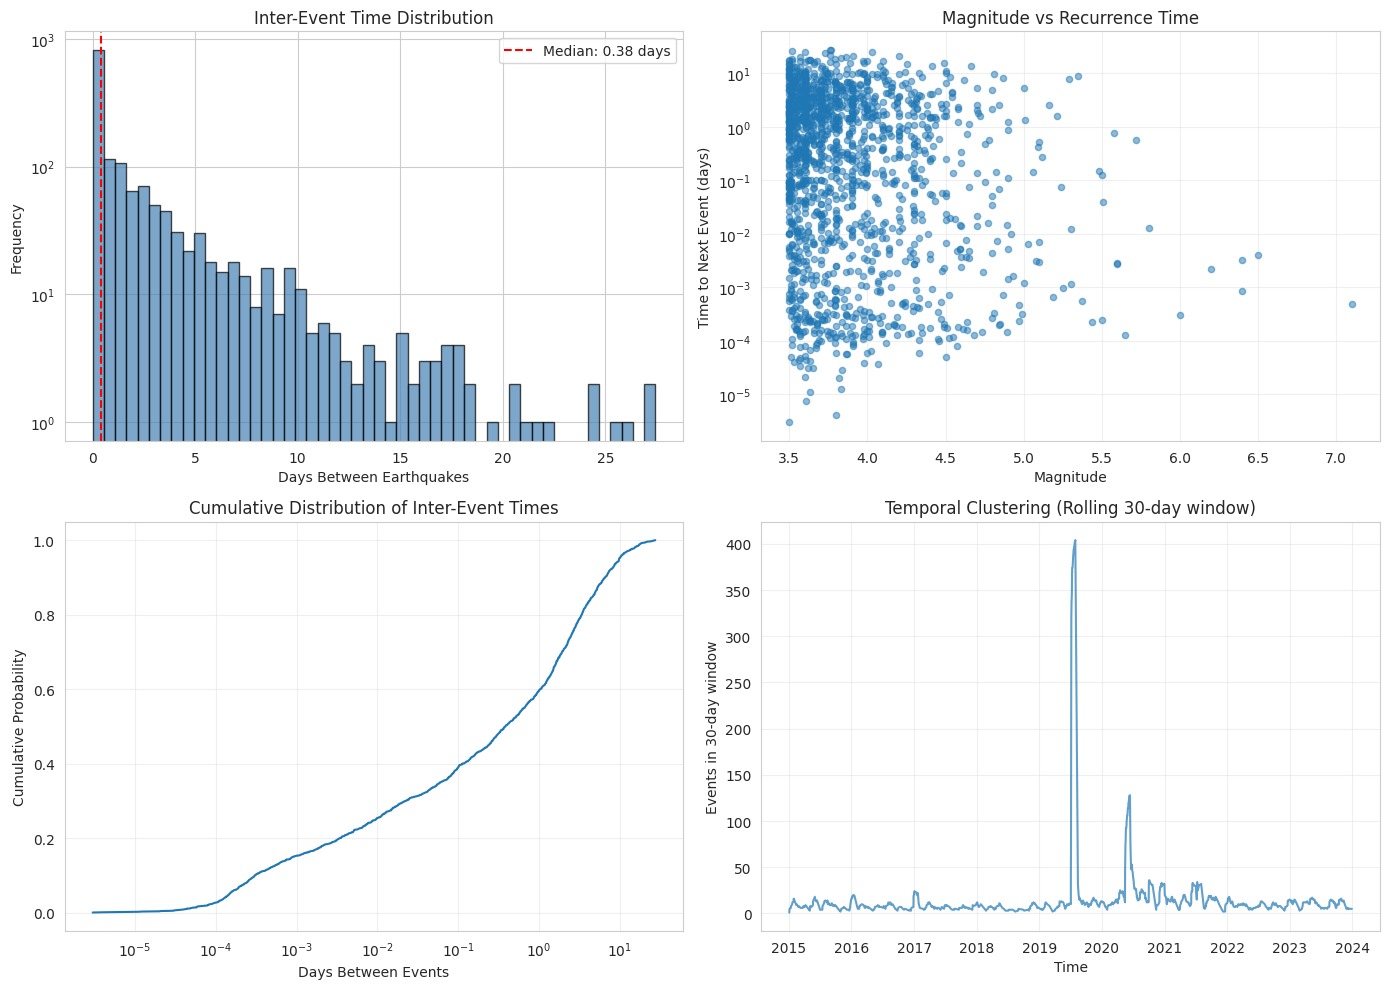


Recurrence Statistics:
  Median inter-event time: 0.38 days
  Mean inter-event time: 2.13 days
  Shortest interval: 0.0000 days (0.0 hours)
  Longest interval: 27.44 days


In [26]:
# Time between consecutive earthquakes
df_sorted = df.sort_values('time').reset_index(drop=True)
intervals = df_sorted['time'].diff().dt.total_seconds() / 86400  # Convert to days

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of inter-event times
axes[0, 0].hist(intervals[1:], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Days Between Earthquakes')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Inter-Event Time Distribution')
axes[0, 0].axvline(intervals.median(), color='red', linestyle='--', label=f'Median: {intervals.median():.2f} days')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')

# 2. Magnitude vs time to next event
axes[0, 1].scatter(df_sorted['magnitude'][:-1], intervals[1:], alpha=0.5, s=20)
axes[0, 1].set_xlabel('Magnitude')
axes[0, 1].set_ylabel('Time to Next Event (days)')
axes[0, 1].set_title('Magnitude vs Recurrence Time')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative inter-event times
sorted_intervals = np.sort(intervals[1:].values)
cumulative = np.arange(1, len(sorted_intervals) + 1) / len(sorted_intervals)
axes[1, 0].plot(sorted_intervals, cumulative)
axes[1, 0].set_xlabel('Days Between Events')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('Cumulative Distribution of Inter-Event Times')
axes[1, 0].set_xscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 4. Temporal clustering - rolling window (FIXED)
window = 30  # days
df_sorted_indexed = df_sorted.set_index('time').sort_index()

# Count events in rolling window
rolling_count = df_sorted_indexed['magnitude'].rolling(window=f'{window}D').count()

axes[1, 1].plot(rolling_count.index, rolling_count.values, alpha=0.7)
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel(f'Events in {window}-day window')
axes[1, 1].set_title(f'Temporal Clustering (Rolling {window}-day window)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRecurrence Statistics:")
print(f"  Median inter-event time: {intervals.median():.2f} days")
print(f"  Mean inter-event time: {intervals.mean():.2f} days")
print(f"  Shortest interval: {intervals.min():.4f} days ({intervals.min()*24:.1f} hours)")
print(f"  Longest interval: {intervals.max():.2f} days")

### 9.6 Circular Time-of-Day Analysis

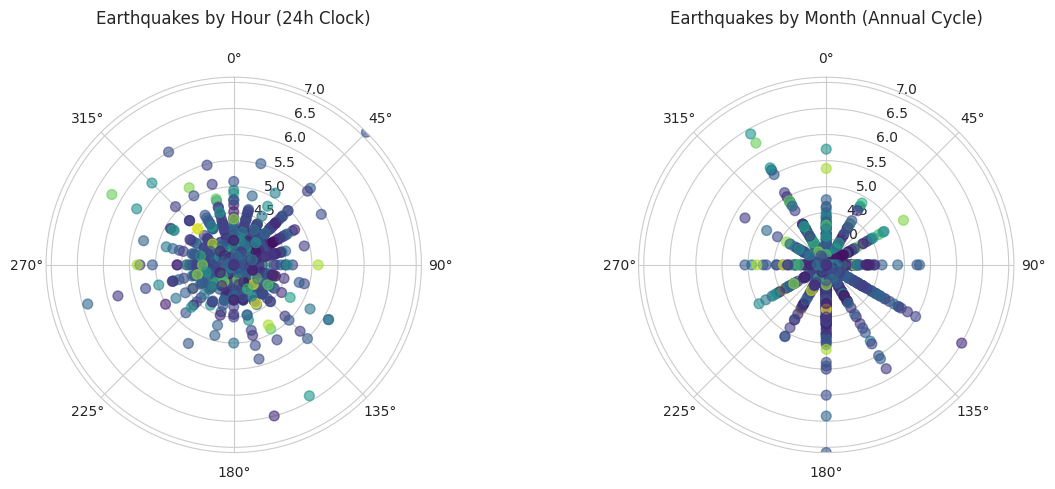

Circular plots help identify if earthquakes prefer certain times
Uniform distribution = no temporal preference (expected for natural earthquakes)


In [22]:
# Polar plot showing if earthquakes happen at specific times
fig = plt.figure(figsize=(12, 5))

# Left: Hour of day
ax1 = plt.subplot(121, projection='polar')
hours = df['hour'].values
hour_angles = hours * (2 * np.pi / 24)
magnitudes = df['magnitude'].values

ax1.scatter(hour_angles, magnitudes, c=df['depth_km'], 
           cmap='viridis', alpha=0.6, s=50)
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Earthquakes by Hour (24h Clock)', pad=20)
ax1.set_ylim(df['magnitude'].min(), df['magnitude'].max())

# Right: Month of year
ax2 = plt.subplot(122, projection='polar')
months = df['month'].values
month_angles = (months - 1) * (2 * np.pi / 12)

ax2.scatter(month_angles, magnitudes, c=df['depth_km'], 
           cmap='viridis', alpha=0.6, s=50)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_title('Earthquakes by Month (Annual Cycle)', pad=20)
ax2.set_ylim(df['magnitude'].min(), df['magnitude'].max())

plt.tight_layout()
plt.show()

print("Circular plots help identify if earthquakes prefer certain times")
print("Uniform distribution = no temporal preference (expected for natural earthquakes)")

### 9.7 Depth Cross-Section View

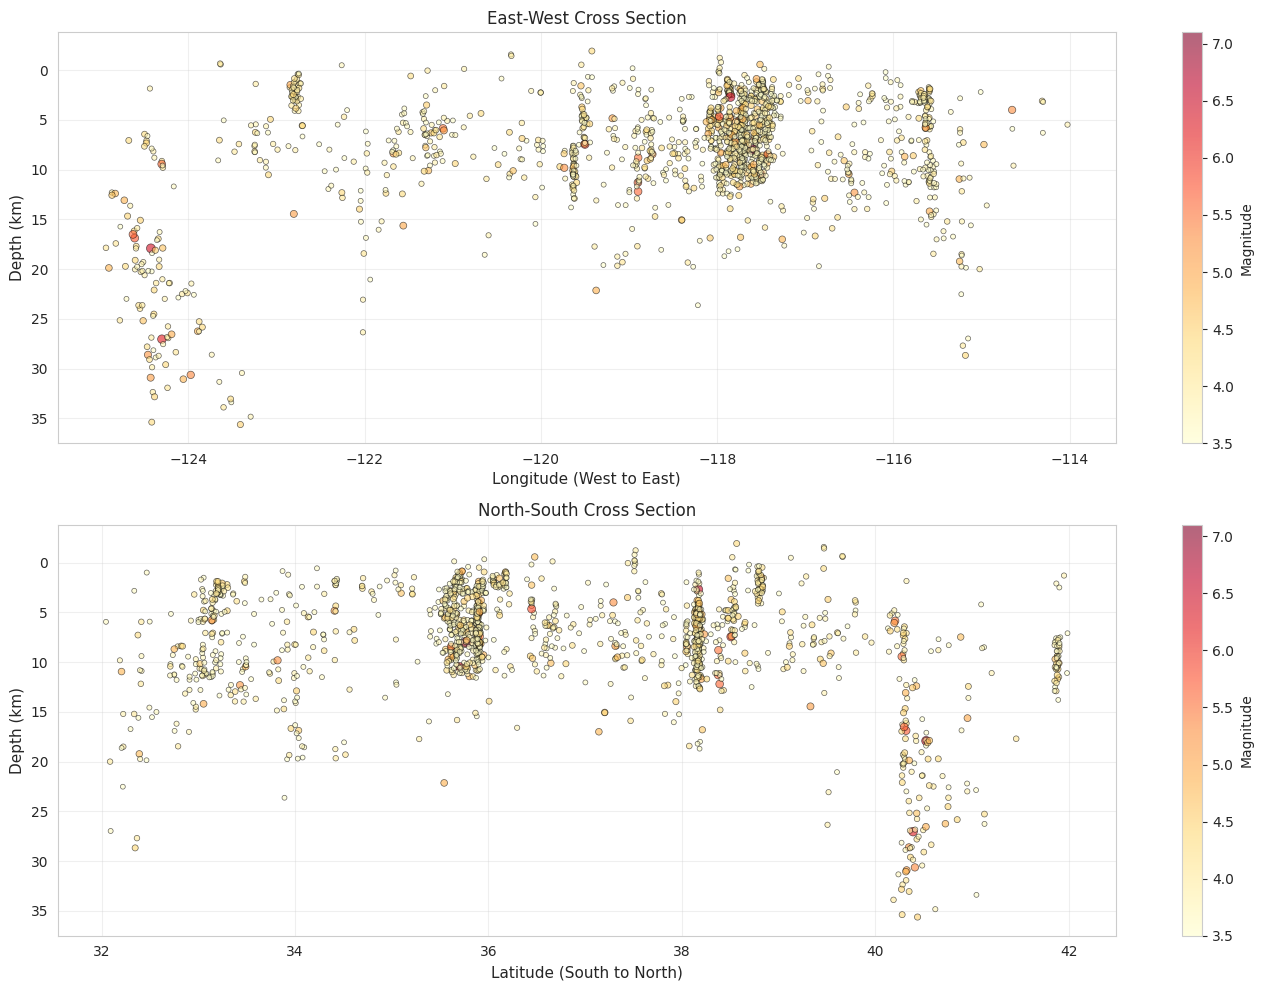

Cross-sections reveal depth patterns along geographic axes


In [23]:
# Create cross-sectional views
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# East-West cross section (along latitude)
scatter1 = axes[0].scatter(df['longitude'], df['depth_km'], 
                          c=df['magnitude'], s=df['magnitude']**2,
                          cmap='YlOrRd', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitude (West to East)', fontsize=11)
axes[0].set_ylabel('Depth (km)', fontsize=11)
axes[0].set_title('East-West Cross Section', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Magnitude')

# North-South cross section (along longitude)
scatter2 = axes[1].scatter(df['latitude'], df['depth_km'], 
                          c=df['magnitude'], s=df['magnitude']**2,
                          cmap='YlOrRd', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Latitude (South to North)', fontsize=11)
axes[1].set_ylabel('Depth (km)', fontsize=11)
axes[1].set_title('North-South Cross Section', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Magnitude')

plt.tight_layout()
plt.show()

print("Cross-sections reveal depth patterns along geographic axes")

### 9.8 Spatial Clustering Analysis

Spatial Clustering Results:
  Number of clusters: 13
  Number of noise points: 159


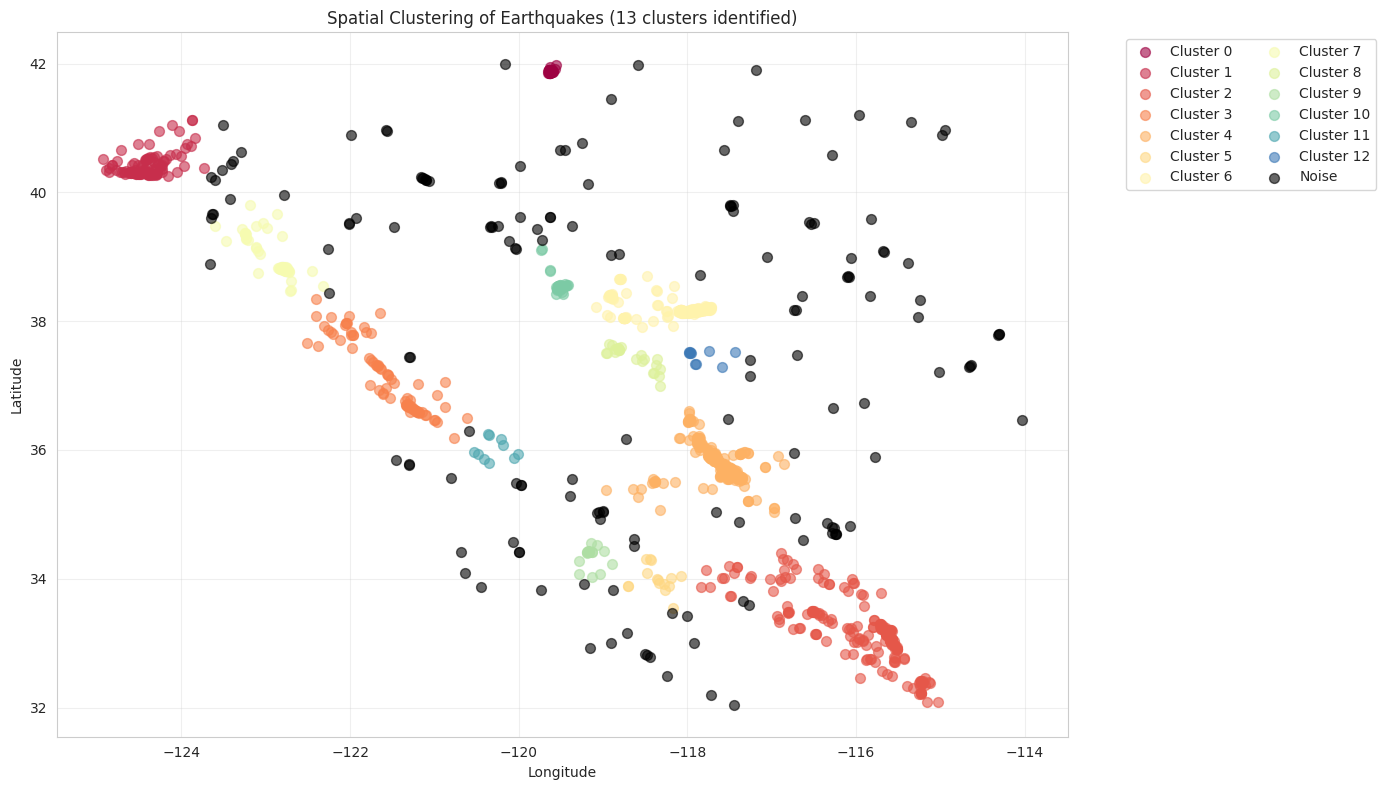


Cluster Statistics:
  Cluster 0: 44 events, Mag range: 3.5-4.7
  Cluster 1: 100 events, Mag range: 3.5-6.4
  Cluster 2: 219 events, Mag range: 3.5-5.2
  Cluster 3: 84 events, Mag range: 3.5-5.1
  Cluster 4: 504 events, Mag range: 3.5-7.1
  Cluster 5: 15 events, Mag range: 3.5-4.5
  Cluster 6: 251 events, Mag range: 3.5-6.5
  Cluster 7: 67 events, Mag range: 3.5-5.1
  Cluster 8: 23 events, Mag range: 3.5-4.8
  Cluster 9: 17 events, Mag range: 3.5-5.1
  Cluster 10: 39 events, Mag range: 3.5-6.0
  Cluster 11: 10 events, Mag range: 3.5-4.3
  Cluster 12: 10 events, Mag range: 3.5-4.8


In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare spatial data
coords = df[['latitude', 'longitude']].values
coords_scaled = StandardScaler().fit_transform(coords)

# DBSCAN clustering
db = DBSCAN(eps=0.15, min_samples=10).fit(coords_scaled)
df['cluster'] = db.labels_

# Count clusters
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = list(db.labels_).count(-1)

print(f"Spatial Clustering Results:")
print(f"  Number of clusters: {n_clusters}")
print(f"  Number of noise points: {n_noise}")

# Visualize clusters
plt.figure(figsize=(14, 8))
unique_labels = set(db.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    
    class_member_mask = (db.labels_ == k)
    xy = coords[class_member_mask]
    
    plt.scatter(xy[:, 1], xy[:, 0], c=[col], s=50, alpha=0.6,
                label=f'Cluster {k}' if k != -1 else 'Noise')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Spatial Clustering of Earthquakes ({n_clusters} clusters identified)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cluster statistics
print(f"\nCluster Statistics:")
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"  Cluster {cluster_id}: {len(cluster_data)} events, "
          f"Mag range: {cluster_data['magnitude'].min():.1f}-{cluster_data['magnitude'].max():.1f}")